6 var

Version 6.html

Create a program that performs the following tasks using a file
according to the option:
1. Reads the file and changes the column names.
2. Finds problems with the data and performs data preprocessing to
fix these problems.

### Importing Libraries and Reading the Dataset

In this cell, we import the necessary libraries for data analysis and visualization:
- `pandas` for data manipulation,
- `matplotlib.pyplot` and `seaborn` for visualization,
- `numpy` for numerical operations.

Then, we read the first table from an HTML file named `Version 6.html` using `pandas.read_html`. The result is stored in the `df` DataFrame.


In [373]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_html("Version 6.html")[0]

### Checking the Dataset Dimensions

This cell displays the shape of the dataset — the number of rows and columns — using `df.shape`.  
It he us understand the size of the dataset before proceeding with analysis.


In [376]:
df.shape

(1472, 6)

### Previewing the First 10 Rows

This cell displays the first 10 rows of the dataset using `df.head(10)`.  
It allows to get a quick overview of the data structure, column names, and sample values.

In [379]:
df.head(10)

,Unnamed: 0,date,meantemp,humidity,wind_speed,meanpressure
0,0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
5,5,2013-01-06,7.000000,82.800000,1.480000,1018.000000
6,6,2013-01-07,7.000000,78.600000,6.300000,1020.000000
7,7,2013-01-08,8.857143,63.714286,7.142857,1018.714286
8,8,2013-01-09,14.000000,51.250000,12.500000,1017.000000
9,9,2013-01-10,11.000000,62.000000,7.400000,1015.666667


### Checking Data Types

This cell shows the data types of each column in the dataset using `df.dtypes`.  
It helps identify whether columns are numeric, textual, or date/time — which is important for proper data processing and analysis.


In [382]:
df.dtypes

Unnamed: 0        int64
date             object
meantemp        float64
humidity        float64
wind_speed      float64
meanpressure    float64
dtype: object

### Summary Statistics of Numeric Columns

This cell provides basic statistical summaries for all numeric columns using `df.describe()`.  
It includes metrics such as count, mean, standard deviation, minimum, maximum, and quartiles, which help assess the distribution and variability of the data.


In [385]:
df.describe()

,Unnamed: 0,meantemp,humidity,wind_speed,meanpressure
count,1472.000000,1469.000000,1470.000000,1467.000000,1470.000000
mean,735.500000,25.449618,60.859598,6.802131,1011.046785
std,425.074111,9.993630,16.757538,4.558714,179.741959
min,0.000000,-218.428571,13.428571,0.000000,-3.041667
25%,367.750000,18.875000,50.500000,3.475000,1001.500000
50%,735.500000,27.875000,62.699248,6.250000,1008.500000
75%,1103.250000,31.375000,72.276786,9.250000,1014.875000
max,1471.000000,100.750000,100.000000,42.220000,7679.333333


### Checking for Duplicate Rows

This cell identifies and displays all duplicate rows in the DataFrame using `df[df.duplicated()]`.  
Key points:
- Helps detect data quality issues
- Shows exact copies of rows
- Important step before analysis to avoid skewed results

Note: An empty output indicates no duplicates were found.

In [388]:
df[df.duplicated()]

,Unnamed: 0,date,meantemp,humidity,wind_speed,meanpressure


### Removing Duplicate Rows

This cell executes `df.drop_duplicates()` to permanently remove all duplicate rows from the DataFrame.  

In this case, wasnt any duplicates, so df.shape shows the same result

In [391]:
df.drop_duplicates()
df.shape

(1472, 6)

### Identifying Missing Values

This cell checks for null/missing values across the DataFrame using `df.isnull()`.

#### What this reveals:
- Returns a boolean mask (True/False) showing null positions
- True indicates missing value, False indicates valitimestamps

In [395]:
df.isnull()

,Unnamed: 0,date,meantemp,humidity,wind_speed,meanpressure
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1467,False,False,False,False,False,False
1468,False,False,False,False,False,False
1469,False,False,False,False,False,False
1470,False,False,False,False,False,False


### Missing Value Inventory

Calculates the total number of missing values per column using `df.isnull().sum()`.`.

In [398]:
df.isnull().sum()

Unnamed: 0      0
date            0
meantemp        3
humidity        2
wind_speed      5
meanpressure    2
dtype: int64

### Visualizing Missing Data Patterns

This cell creates a heatmap of missing values

<Axes: >

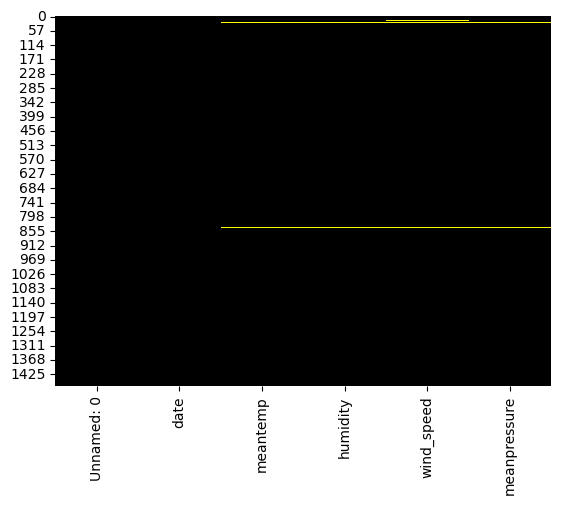

In [401]:
colours = ['black', 'yellow']
sns.heatmap(df.isnull(), cmap=sns.color_palette(colours), cbar=False)

Creates a new DataFrame `df1` by removing all rows with missing values and check the result

In [404]:
df1 = df.dropna()

In [406]:
df1.shape

(1467, 6)

<Axes: >

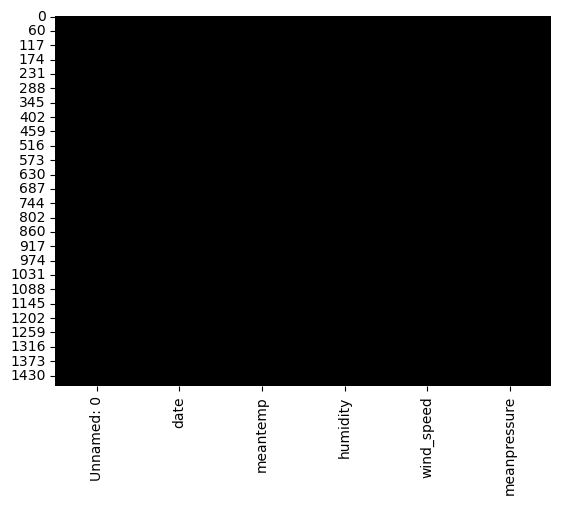

In [408]:
colours = ['black', 'yellow']
sns.heatmap(df1.isnull(), cmap=sns.color_palette(colours), cbar=False)

### Rows with >2 Missing Values
Identifies records with more than 2 missing fields

In [411]:
g = 2
df_gaps_more_than_g = df[df.isnull().sum(axis=1) > g]
df_gaps_more_than_g

,Unnamed: 0,date,meantemp,humidity,wind_speed,meanpressure
24,24,2013-01-24,NaN,NaN,NaN,NaN
840,840,2015-04-20,NaN,NaN,NaN,NaN


### Clean Dataset After Filtering
Creates `df2` containing only rows with **≤2 missing values**

In [414]:
df2 = df[df.isnull().sum(axis=1) <= g]
df2.shape

(1470, 6)

### Missing Values After Filtering (Final Check)

 Only 1 row remains with ≤2 missing values (`g=2`). Heatmap visually confirms remaining nulls

<Axes: >

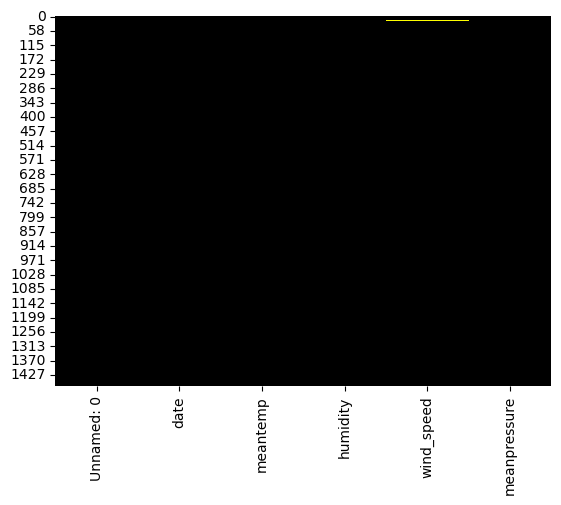

In [417]:
sns.heatmap(df2.isnull(), cmap=sns.color_palette(colours), cbar=False)

Replaces all remaining nulls with 0

<Axes: >

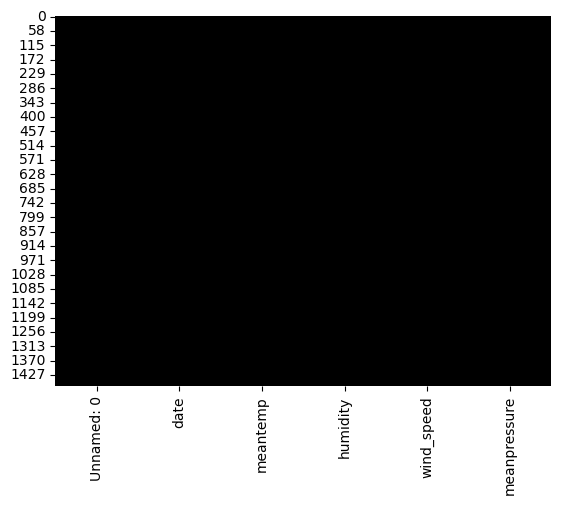

In [420]:
df2 = df2.fillna(0)
sns.heatmap(df2.isnull(), cmap=sns.color_palette(colours), cbar=False)

In [422]:
# df4 = df2.fillna(df2.median())
# Create a copy of df2 to avoid modifying the original DataFrame
df4 = df2.copy()

# Fill missing values in 'wind_speed' with the mean of that column (rounded to 3 decimals)
df4["wind_speed"] = df2["wind_speed"].fillna(round(df2["wind_speed"].mean(), 3))

# Fill missing values in 'meantemp' with the mean of that column (rounded to 3 decimals)
df4["meantemp"] = df2["meantemp"].fillna(round(df2["meantemp"].mean(), 3))


<Axes: >

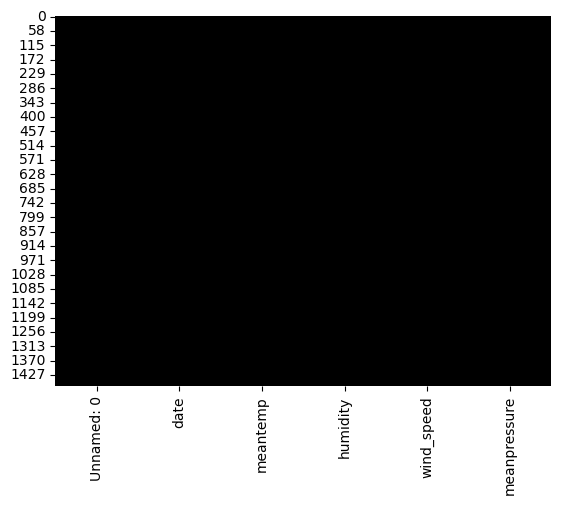

In [424]:
sns.heatmap(df4.isnull(), cmap=sns.color_palette(colours), cbar=False)

In [426]:
df.isnull().sum()

Unnamed: 0      0
date            0
meantemp        3
humidity        2
wind_speed      5
meanpressure    2
dtype: int64

In [428]:
df4.isnull().sum()

Unnamed: 0      0
date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

In [430]:
df4.dtypes

Unnamed: 0        int64
date             object
meantemp        float64
humidity        float64
wind_speed      float64
meanpressure    float64
dtype: object

### Converting `date` Column to Datetime Format

Check the data types of all columns using `df4.dtypes`.  
Then, it converts the `date` column to `datetime64` format with `pd.to_datetime()`,  
which is crucial for proper time-based operations like filtering, resampling, or plotting.

In [433]:
df4['date'] = pd.to_datetime(df4['date'])

In [435]:
df4.dtypes

Unnamed: 0               int64
date            datetime64[ns]
meantemp               float64
humidity               float64
wind_speed             float64
meanpressure           float64
dtype: object

### Visualizing Distribution with Boxplots

Creates a boxplot for the numeric columns `meantemp`, `humidity`, `wind_speed`, and `meanpressure`.  
Uses for visualizing the distribution, central tendency, and potential outliers in each column.


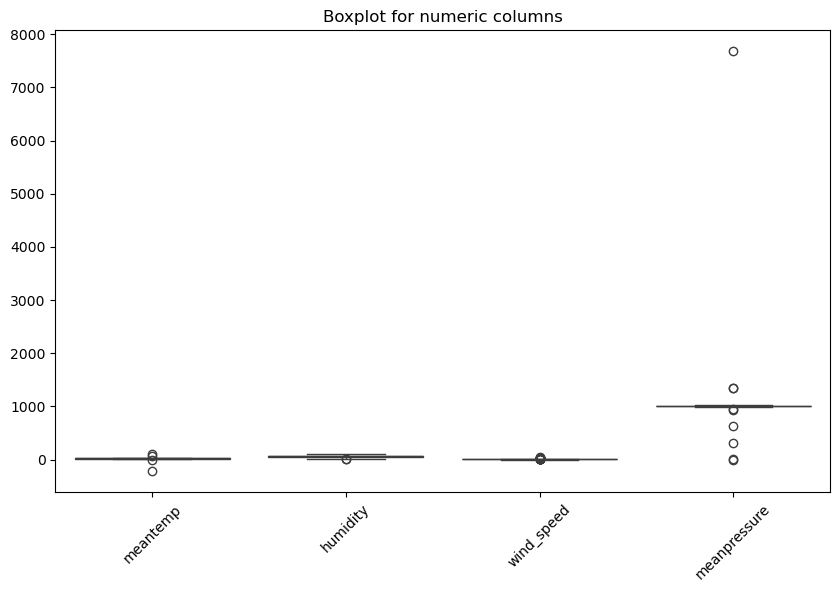

In [438]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df4[['meantemp', 'humidity', 'wind_speed', 'meanpressure']])
plt.xticks(rotation=45)
plt.title('Boxplot for numeric columns')
plt.show()

### Detecting Outliers Using the IQR Method

This function `detect_outliers_iqr()` identifies outliers in a specified column using the Interquartile Range (IQR) method.  
Outliers are defined as values that fall below Q1 - 1.5×IQR or above Q3 + 1.5×IQR.  
It returns a subset of the original DataFrame containing only the detected outlier rows.

In [441]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

### Counting Outliers in Numeric Columns

Applies the IQR-based outlier detection to each of the columns:  
`meantemp`, `humidity`, `wind_speed`, and `meanpressure`,  
and prints the number of detected outliers for each.


In [444]:
for col in ['meantemp', 'humidity', 'wind_speed', 'meanpressure']:
    outliers = detect_outliers_iqr(df4, col)
    print(f"{col}: {len(outliers)} outliers")


meantemp: 4 outliers
humidity: 2 outliers
wind_speed: 30 outliers
meanpressure: 9 outliers


### Replacing Outliers with Median

Defines a function that replaces outliers in a given column with the column's median value.  
Outliers are identified using the IQR method, and their values are overwritten in-place.


In [447]:
def replace_outliers_with_median(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median = data[column].median()
    data.loc[(data[column] < lower_bound) | (data[column] > upper_bound), column] = median


### Applying Outlier Replacement

Replaces outliers with the median value in each of the columns:  
`meantemp`, `humidity`, `wind_speed`, and `meanpressure`,  
using the previously defined IQR-based replacement function.

In [450]:
for col in ['meantemp', 'humidity', 'wind_speed', 'meanpressure']:
    replace_outliers_with_median(df4, col)


In [452]:
for col in ['meantemp', 'humidity', 'wind_speed', 'meanpressure']:
    outliers = detect_outliers_iqr(df4, col)
    print(f"{col}: {len(outliers)} outliers")

meantemp: 0 outliers
humidity: 0 outliers
wind_speed: 14 outliers
meanpressure: 0 outliers


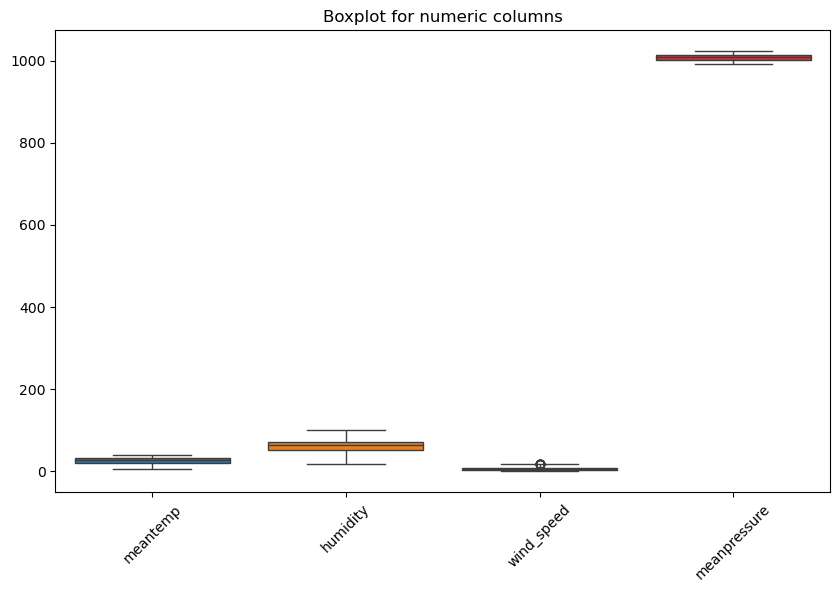

In [454]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df4[['meantemp', 'humidity', 'wind_speed', 'meanpressure']])
plt.xticks(rotation=45)
plt.title('Boxplot for numeric columns')
plt.show()

### Visualizing Correlation Matrix

This cell creates a heatmap to visualize the correlation matrix of numeric columns in the dataset.  
The `coolwarm` color palette is used, and the correlation coefficients are annotated in each cell to show the strength of relationships between the variables.


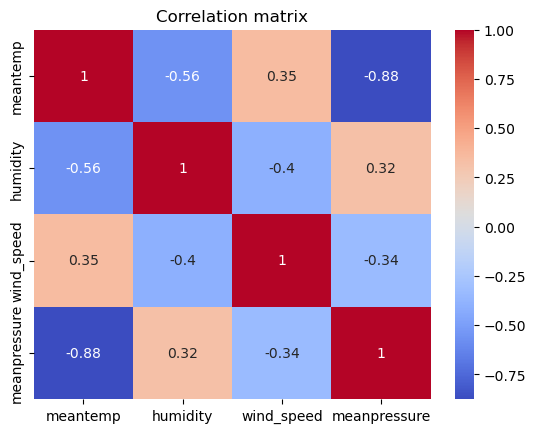

In [457]:
df4 = df4.loc[:, ~df4.columns.str.contains('^Unnamed')]
sns.heatmap(df4.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation matrix")
plt.show()


### Extracting Date Features

This cell extracts several time-related features from the `date` column:  
- `year`, `month`, and `day` are derived from the `date` column to break it down into individual components.  
- `weekday` represents the day of the week (0 = Monday, 6 = Sunday).  
- `is_weekend` is a binary feature indicating whether the day is a weekend (1 for Saturday and Sunday, 0 for weekdays).


In [460]:
df4['year'] = df4['date'].dt.year
df4['month'] = df4['date'].dt.month
df4['day'] = df4['date'].dt.day
df4['weekday'] = df4['date'].dt.dayofweek
df4['is_weekend'] = df4['weekday'].isin([5, 6]).astype(int)

In [462]:
df4.head(10)

,date,meantemp,humidity,wind_speed,meanpressure,year,month,day,weekday,is_weekend
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,2013,1,1,1,0
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,2013,1,2,2,0
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,2013,1,3,3,0
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,2013,1,4,4,0
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,2013,1,5,5,1
5,2013-01-06,7.000000,82.800000,1.480000,1018.000000,2013,1,6,6,1
6,2013-01-07,7.000000,78.600000,6.300000,1020.000000,2013,1,7,0,0
7,2013-01-08,8.857143,63.714286,7.142857,1018.714286,2013,1,8,1,0
8,2013-01-09,14.000000,51.250000,12.500000,1017.000000,2013,1,9,2,0
9,2013-01-10,11.000000,62.000000,7.400000,1015.666667,2013,1,10,3,0


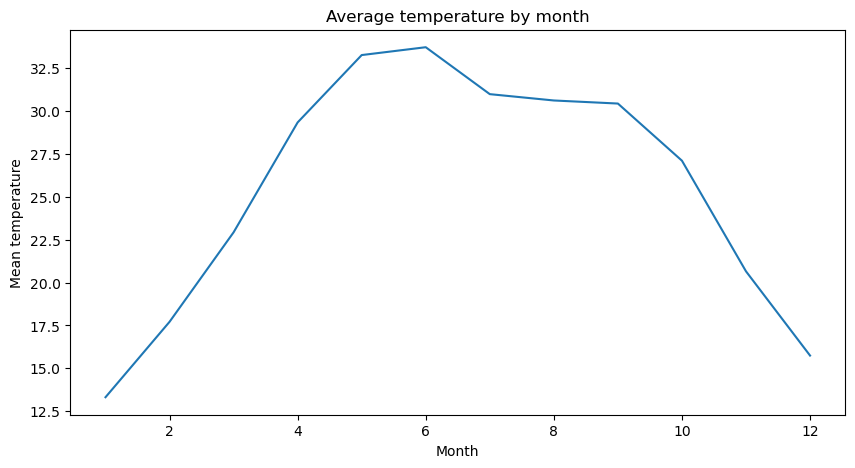

In [464]:
monthly_avg = df4.groupby('month')['meantemp'].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_avg.index, y=monthly_avg.values)
plt.title('Average temperature by month')
plt.xlabel('Month')
plt.ylabel('Mean temperature')
plt.show()


In [466]:
df4.to_csv("cleaned_version6.csv")